<a href="https://colab.research.google.com/github/AniruddhA-Omni/Devspace2022_ps1/blob/main/ps1_devspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLAEDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('/content/drive/MyDrive/all_matches.csv')
ipl22 = pd.read_csv('/content/drive/MyDrive/IPL_Auction_2022_FullList.csv')
strk = pd.read_csv('/content/drive/MyDrive/most_runs_average_strikerate.csv')

### All previous year matches' dataset

In [3]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.2,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.3,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,Shivam Mavi,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.4,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.5,Kolkata Knight Riders,Chennai Super Kings,Shivam Mavi,LH Ferguson,...,0,NaN,NaN,NaN,NaN,NaN,caught,Shivam Mavi,NaN,NaN
208041,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Recent year's IPL Auction dataset

In [5]:
ipl22.head()

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,1,M,Trent Boult,New Zealand,NaN,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,"SRH, KKR, DD,MI",MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,1,M,Pat Cummins,Australia,NaN,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,"DD, MI, KKR",KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,1,M,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,"DCH, MI, SRH, DC",DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,1,M,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,1,M,Kagiso Rabada,South Africa,NaN,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,DC,Capped,200,9.25 CR,Punjab Kings,Sold


In [6]:
ipl22.tail()

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
584,62,UAL15,Safyaan Sharif,Scotland,NaN,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Associate,20,NaN,NaN,UnSold
585,62,UAL15,Henry Shipley,New Zealand,NaN,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
586,62,UAL15,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
587,62,UAL15,Johan Van Dyk,South Africa,NaN,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
588,62,UAL15,Dunith Wellalage,Sri Lanka,NaN,19,ALL-ROUNDER,LHB,LEFT ARM Slow Orthodox,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold


###Batsman History Dataset

In [53]:
strk.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [54]:
strk.tail()

,batsman,total_runs,out,numberofballs,average,strikerate
511,ND Doshi,0,1,13,0.0,0.0
512,J Denly,0,1,1,0.0,0.0
513,S Ladda,0,2,9,0.0,0.0
514,V Pratap Singh,0,1,1,0.0,0.0
515,S Kaushik,0,1,1,0.0,0.0


###Random sample from Datasets

In [7]:
df.sample()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
163115,1136580,2018,2018-04-22,Rajiv Gandhi International Stadium,2,14.1,Sunrisers Hyderabad,Chennai Super Kings,KS Williamson,YK Pathan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ipl22.sample()

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
404,42,UWK4,Fazil Makaya,India,JKCA,25,WICKETKEEPER,RHB,-,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold


#Data Preprocessing

In [9]:
df.shape

(208042, 22)

In [10]:
ipl22.shape

(589, 17)

In [55]:
strk.shape

(516, 6)

In [11]:
df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,2.080420e+05,208042.000000,208042.000000,208042.000000,208042.000000,6324.000000,846.000000,547.000000,3288.000000,2.0,0.0,0.0
mean,7.913677e+05,1.483744,9.538335,1.239783,0.066213,1.203985,1.041371,1.829982,1.298358,5.0,NaN,NaN
std,3.212030e+05,0.503388,5.682836,1.610708,0.338622,0.783636,0.356764,1.291837,0.837280,0.0,NaN,NaN
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
25%,5.012420e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
50%,7.340090e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
75%,1.136584e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN
max,1.254117e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN


In [56]:
strk.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


###Column Names of 1st Dataset

In [12]:
df.columns.values

array(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'], dtype=object)

###Column Names of Auction Dataset

In [13]:
ipl22.columns.values

array(['Set No.', 'Set Name', 'Player', 'Country', 'State Association',
       'Age', 'Specialism', 'Batting', 'Bowling', 'IPL',
       'Previous IPLTeam(s)', '2021 Team', 'C/U/A', 'Base Price',
       'Sold Price', 'New Franchise', 'Bid'], dtype=object)

###Column Names of Batsman Dataset

In [57]:
strk.columns.values

array(['batsman', 'total_runs', 'out', 'numberofballs', 'average',
       'strikerate'], dtype=object)

###Information about the datasets

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  float64
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [15]:
ipl22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Set No.              589 non-null    int64  
 1   Set Name             589 non-null    object 
 2   Player               589 non-null    object 
 3   Country              589 non-null    object 
 4   State Association    369 non-null    object 
 5   Age                  589 non-null    int64  
 6   Specialism           589 non-null    object 
 7   Batting              589 non-null    object 
 8   Bowling              589 non-null    object 
 9   IPL                  270 non-null    float64
 10  Previous IPLTeam(s)  265 non-null    object 
 11  2021 Team            165 non-null    object 
 12  C/U/A                589 non-null    object 
 13  Base Price           589 non-null    int64  
 14  Sold Price           204 non-null    object 
 15  New Franchise        204 non-null    obj

In [58]:
strk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


####Total Null Values in each dataset

In [16]:
df.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     201718
noballs                   207196
byes                      207495
legbyes                   204754
penalty                   208040
wicket_type               197803
player_dismissed          197803
other_wicket_type         208042
other_player_dismissed    208042
dtype: int64

In [17]:
ipl22.isnull().sum()

Set No.                  0
Set Name                 0
Player                   0
Country                  0
State Association      220
Age                      0
Specialism               0
Batting                  0
Bowling                  0
IPL                    319
Previous IPLTeam(s)    324
2021 Team              424
C/U/A                    0
Base Price               0
Sold Price             385
New Franchise          385
Bid                      0
dtype: int64

In [59]:
strk.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

###Dropping unnecessary columns of Auction Dataset

In [18]:
ipl22 = ipl22.drop(labels=['Set No.','Set Name','Country','State Association','Sold Price','Base Price','Bid','Age','Batting','Bowling','C/U/A'], axis=1)

In [19]:
ipl22.head()

,Player,Specialism,IPL,Previous IPLTeam(s),2021 Team,New Franchise
0,Trent Boult,BOWLER,62.0,"SRH, KKR, DD,MI",MI,Rajasthan Royals
1,Pat Cummins,ALL-ROUNDER,37.0,"DD, MI, KKR",KKR,Kolkata Knight Riders
2,Shikhar Dhawan,BATSMAN,192.0,"DCH, MI, SRH, DC",DC,Punjab Kings
3,Shreyas Iyer,BATSMAN,87.0,DC,DC,Kolkata Knight Riders
4,Kagiso Rabada,BOWLER,50.0,DC,DC,Punjab Kings


####Teams for IPL 2022

In [20]:
 teams = ['Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings','Punjab Kings','Rajasthan Royals','Delhi Capitals','Mumbai Indians','Lucknow Super Giants',"Sunrisers Hyderabad",'Gujarat Titans']

###Modfiying IPL dataset

In [60]:
strk.average.fillna(0, inplace=True)

####Changing names of IPL Teams

In [21]:
df['batting_team'] = df['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
df['batting_team'] = df['batting_team'].replace('Kings XI Punjab','Punjab Kings')
df['batting_team'] = df['batting_team'].replace(['Deccan Chargers','Gujarat Lions'],'Gujarat Titans')

In [22]:
df['bowling_team'] = df['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
df['bowling_team'] = df['batting_team'].replace('Kings XI Punjab','Punjab Kings')
df['bowling_team'] = df['batting_team'].replace(['Deccan Chargers','Gujarat Lions'],'Gujarat Titans')

####Dropping old teams which are not in New IPL 2022

In [23]:
df = df.drop(df.index[df['batting_team'] == 'Pune Warriors'])
df = df.drop(df.index[df['batting_team'] == 'Rising Pune Supergiants'])
df = df.drop(df.index[df['batting_team'] == 'Rising Pune Supergiant'])
df = df.drop(df.index[df['batting_team'] == 'Kochi Tuskers Kerala'])

In [24]:
df = df.drop(df.index[df['bowling_team'] == 'Pune Warriors'])
df = df.drop(df.index[df['bowling_team'] == 'Rising Pune Supergiants'])
df = df.drop(df.index[df['bowling_team'] == 'Rising Pune Supergiant'])
df = df.drop(df.index[df['bowling_team'] == 'Kochi Tuskers Kerala'])

In [25]:
df.reset_index(inplace = True, drop = True)

In [26]:
df.shape

(197537, 22)

### Percentage of NULL values

In [27]:
df.isnull().sum()/df.isnull().count() * 100 # % of null values

match_id                    0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.957532
noballs                    99.592988
byes                       99.735746
legbyes                    98.418018
penalty                    99.998988
wicket_type                95.091046
player_dismissed           95.091046
other_wicket_type         100.000000
other_player_dismissed    100.000000
dtype: float64

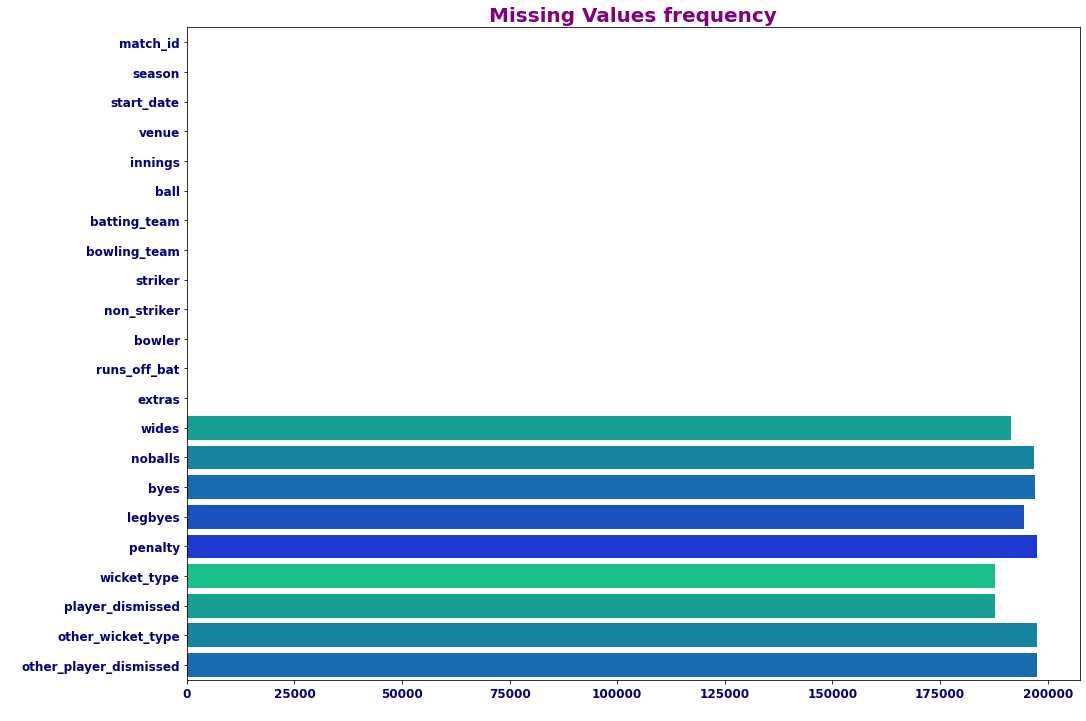

In [28]:
missing_df = df.isnull().sum().to_frame().reset_index().rename({0: 'missing_val_%'}, axis = 1)
plt.figure(figsize = (16,12))
sns.barplot(data = missing_df, x = 'missing_val_%', y = 'index',palette=sns.color_palette('winter_r'))
plt.title('Missing Values frequency', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

###Imputation

In [29]:
df.player_dismissed.fillna('Not Applicable', inplace = True)
df.other_player_dismissed.fillna('Not Applicable', inplace = True)

In [30]:
df.wides.fillna(0, inplace = True)
df.noballs.fillna(0, inplace = True)
df.byes.fillna(0, inplace = True)
df.legbyes.fillna(0, inplace = True)
df.penalty.fillna(0, inplace = True)

In [31]:
df.wicket_type.fillna('Not Applicable', inplace = True)
df.other_wicket_type.fillna('Not Applicable', inplace = True)

####Checking percentage of null values after imputation

In [32]:
df.isnull().sum()/df.isnull().count() * 100 # % of null values

match_id                  0.0
season                    0.0
start_date                0.0
venue                     0.0
innings                   0.0
ball                      0.0
batting_team              0.0
bowling_team              0.0
striker                   0.0
non_striker               0.0
bowler                    0.0
runs_off_bat              0.0
extras                    0.0
wides                     0.0
noballs                   0.0
byes                      0.0
legbyes                   0.0
penalty                   0.0
wicket_type               0.0
player_dismissed          0.0
other_wicket_type         0.0
other_player_dismissed    0.0
dtype: float64

In [33]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Kolkata Knight Riders,SC Ganguly,BB McCullum,...,1,0.0,0.0,0.0,1.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,SC Ganguly,...,1,1.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Kolkata Knight Riders,BB McCullum,SC Ganguly,...,0,0.0,0.0,0.0,0.0,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


##Exploratory Data Analysis

In [34]:
print(f"Total Matches Played: {df.match_id.nunique()}\n\nVenues Played At: Total: {df['venue'].nunique()}\
{df['venue'].unique()} \
\n\nTeams : Total: {df['batting_team'].nunique()} {df['batting_team'].unique()}")

Total Matches Played: 875

Venues Played At: Total: 46['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 '

####Number of matches played in Various cities

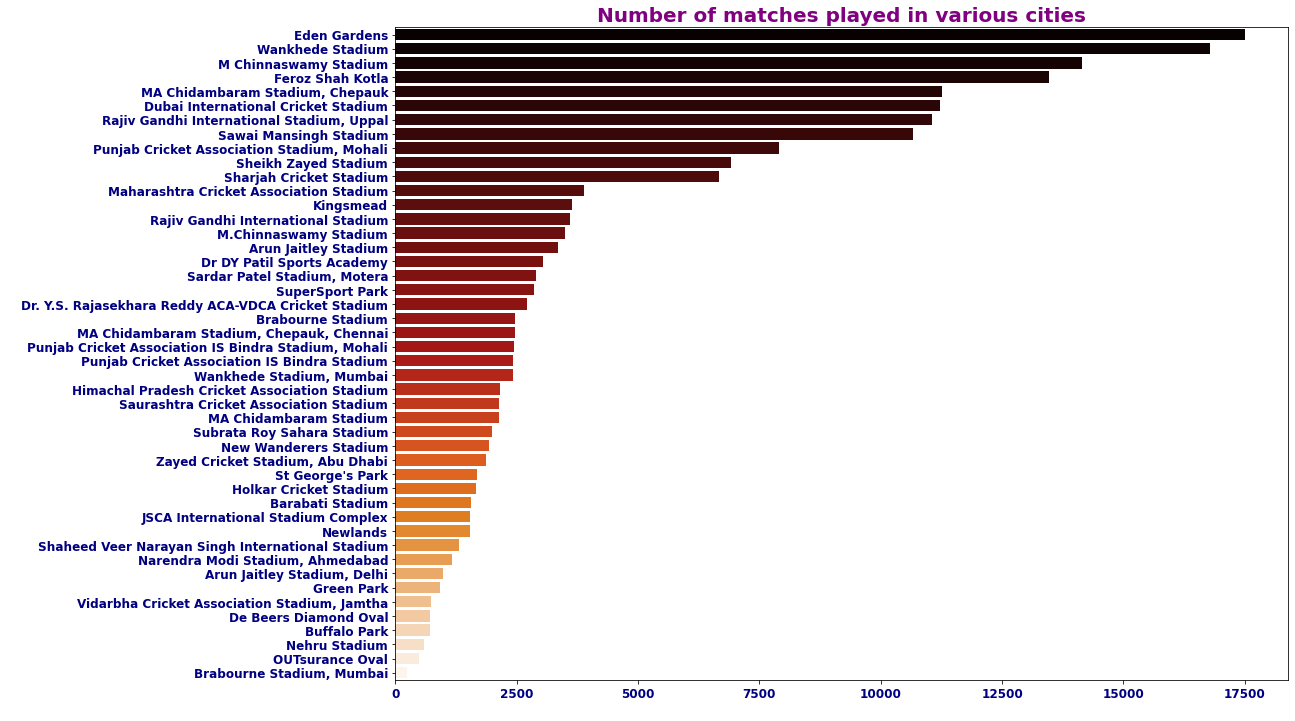

In [35]:
plt.figure(figsize = (16,12))
order_list = df.venue.value_counts().index.tolist()
sns.countplot(y=df.venue, palette='gist_heat', order = order_list)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

###Number of deliveries played by Each team

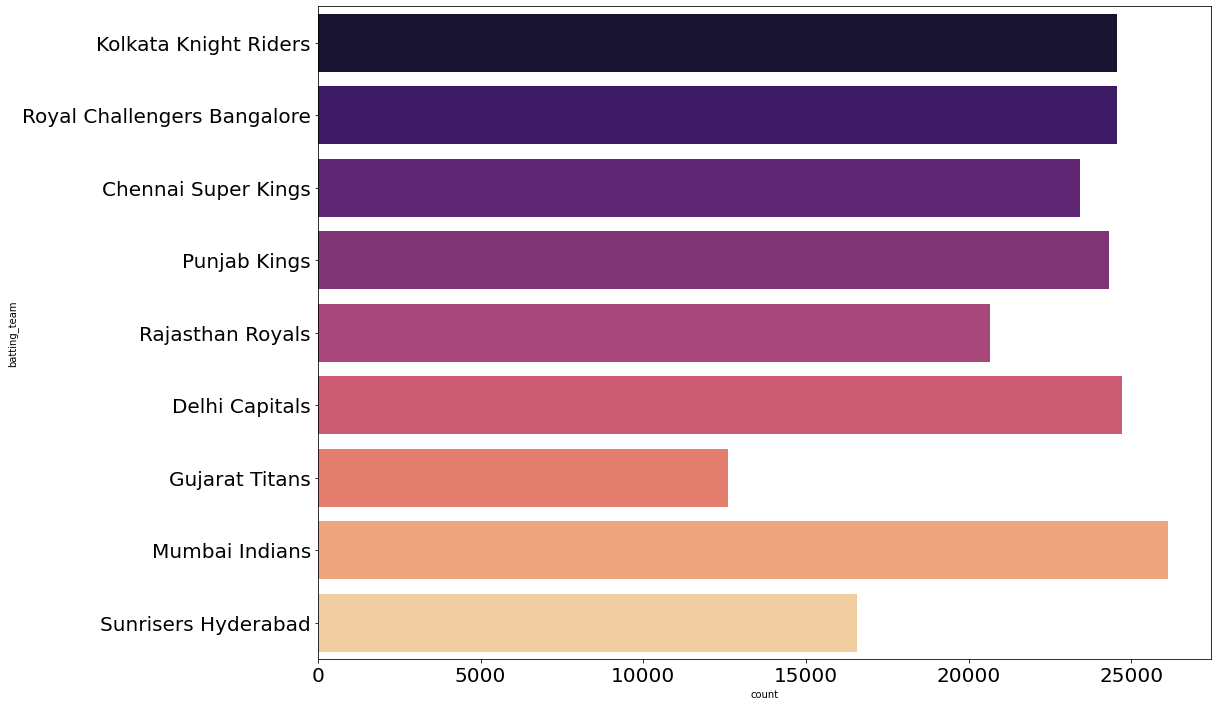

In [36]:
plt.figure(figsize=(16,12))
sns.countplot(y = df['batting_team'],palette="magma")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

###Number of Deliveries given By Each team

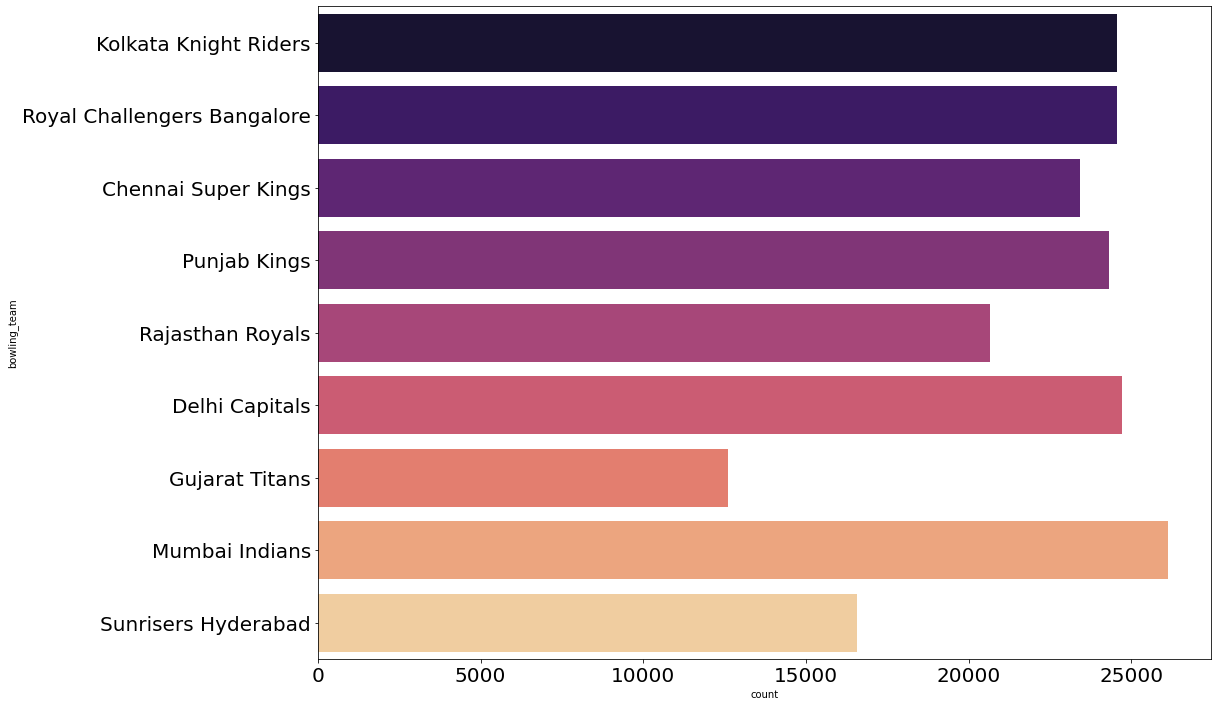

In [37]:
plt.figure(figsize=(16,12))
sns.countplot(y = df['bowling_team'],palette="magma")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

###Calculating Total Runs in each Match and finding Winning Team

In [38]:
new_d = {'Team1':[],'Team2':[],'Winner':[],'Team1_Run':[],'Team2_Run':[]}
i = 1
runs = 0
k = 0
new_d['Team1'].append(df['batting_team'][0])
index = 0
result = 0

for j in df['innings']:
  if ( i == j):
    runs += df['runs_off_bat'][k] + df['extras'][k]
  else:
    i = j
    if j == 1:
      new_d['Team2_Run'].append(runs)
      new_d['Team1'].append(df['batting_team'][k])
      new_d['Team2'].append(df['bowling_team'][k-1])
      #####
      if new_d["Team1_Run"][index] > new_d["Team2_Run"][index]:
        result = 1 # team1 wins
      elif new_d["Team1_Run"][index] < new_d["Team2_Run"][index]:
        result = 2 # team2 wins
      else:
        result = 0 # tie
      #####
      new_d['Winner'].append(result)
      index += 1
    else:
      new_d['Team1_Run'].append(runs)
      
    runs = (df['runs_off_bat'][k] + df['extras'][k])
  k += 1
new_d['Team1_Run'] = new_d['Team1_Run'][:789]
new_d['Team2_Run'] = new_d['Team2_Run'][:789]
new_d['Team1'] = new_d['Team1'][:789]
new_d['Team2'] = new_d['Team2'][:789]
new_d['Winner'] = new_d['Winner'][:789]

In [39]:
dd = pd.DataFrame(new_d)

In [40]:
dd.head()

,Team1,Team2,Winner,Team1_Run,Team2_Run
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,222,82
1,Chennai Super Kings,Punjab Kings,1,240,207
2,Rajasthan Royals,Delhi Capitals,2,129,132
3,Gujarat Titans,Kolkata Knight Riders,2,110,112
4,Mumbai Indians,Royal Challengers Bangalore,2,165,166


###Whether Batting first or Fielding first matters?
It can be seen that **the team which is batting** is most likely to win the match.

1    478
2    307
0      4
Name: Winner, dtype: int64


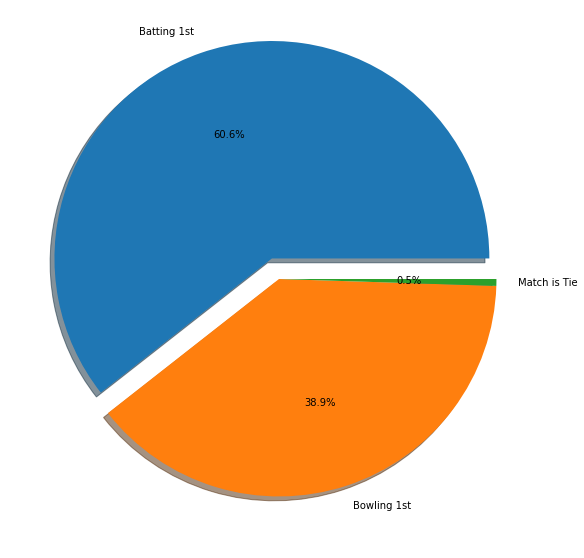

In [41]:
plt.figure(figsize=(20,10))
match_winner = dd["Winner"].value_counts()
labels = ["Batting 1st","Bowling 1st","Match is Tie"]
explode = [0.1,0,0]
plt.pie(match_winner, autopct='%.01f%%', labels=labels, shadow=True, explode = explode)
print(dd["Winner"].value_counts())

###Total Percentage of Wins by each teams

Mumbai Indians                 107
Chennai Super Kings            101
Royal Challengers Bangalore     96
Punjab Kings                    96
Delhi Capitals                  92
Rajasthan Royals                89
Kolkata Knight Riders           84
Sunrisers Hyderabad             80
Gujarat Titans                  40
Tie                              4
Name: Winner, dtype: int64


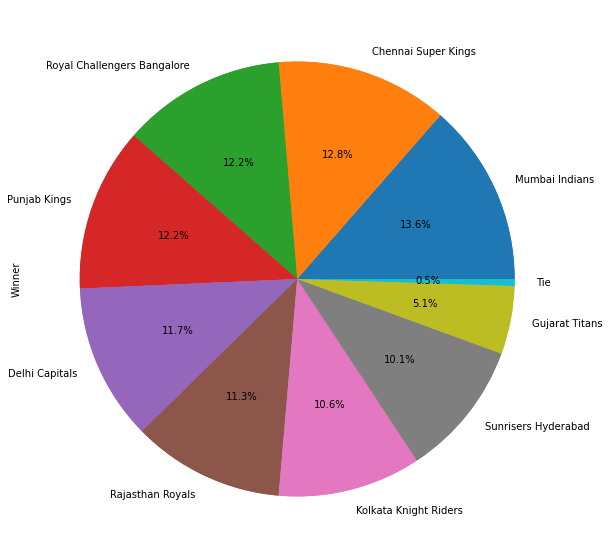

In [45]:
plt.figure(figsize=(20,10))
match_winner = dd["Winner"].value_counts()
plt.pie(match_winner)
match_winner.plot(kind="pie",autopct='%.01f%%')
print(dd["Winner"].value_counts())

In [43]:
ndd = dd
for i in range(dd.shape[0]):
  if ndd['Winner'][i] == 1:
    ndd['Winner'][i] = ndd['Team1'][i]
  elif ndd['Winner'][i] == 2:
    ndd['Winner'][i] = ndd['Team2'][i]
  else:
    ndd['Winner'][i] = 'Tie'


###Total Number of Wins of Each Team

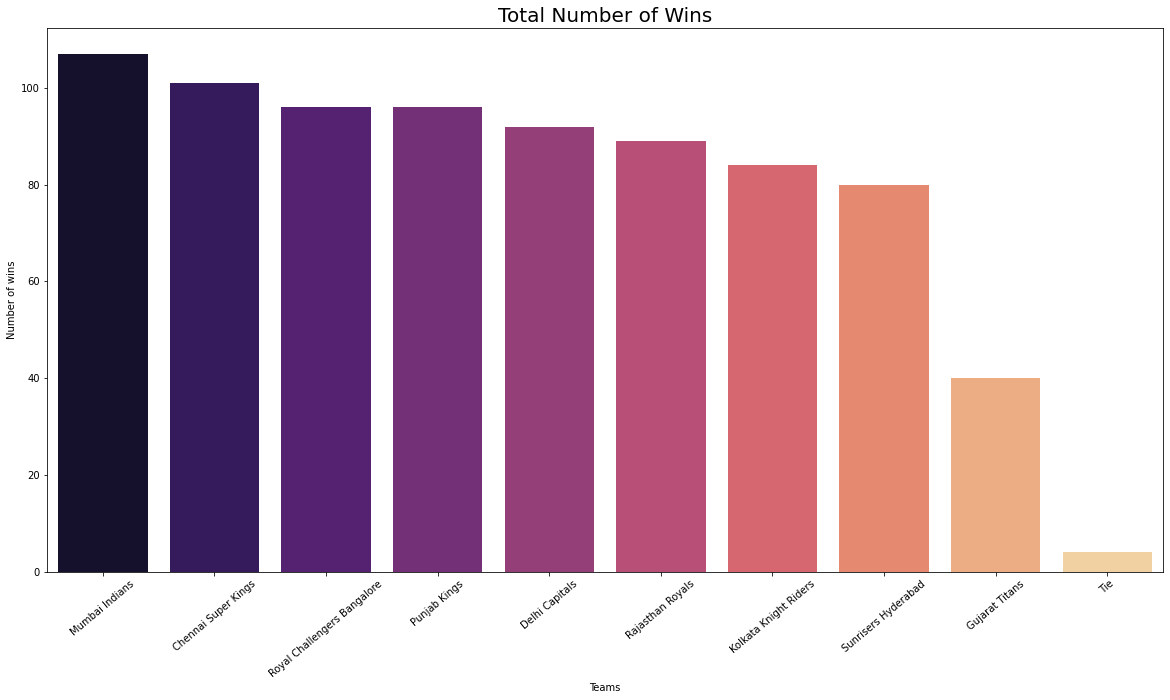

Mumbai Indians                 107
Chennai Super Kings            101
Royal Challengers Bangalore     96
Punjab Kings                    96
Delhi Capitals                  92
Rajasthan Royals                89
Kolkata Knight Riders           84
Sunrisers Hyderabad             80
Gujarat Titans                  40
Tie                              4
Name: Winner, dtype: int64


In [44]:
plt.figure(figsize=(20,10))
sns.barplot(ndd["Winner"].value_counts().index, ndd["Winner"].value_counts(), palette='magma')
plt.title('Total Number of Wins', fontsize = 20)
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.xticks(rotation = 40)
plt.show()
print(ndd["Winner"].value_counts())

1. It can be inferred that ***Mumbai Indians, Chennai Super Kings, Royal Challengers Bangalore, Punjab Kings*** are the top 4 best teams. And these are most likely to qualify for play-offs.
2. Mumbai Indians and Chennai Super Kings are the top two best teams in IPL. So, interms of maximum wins and maximum IPL Champion titles, the chances of winning IPL2022 is more for ***Mumbai Indians.***

###Average Score made by team1 (Batting 1st) and team2 (Bowling 1st)

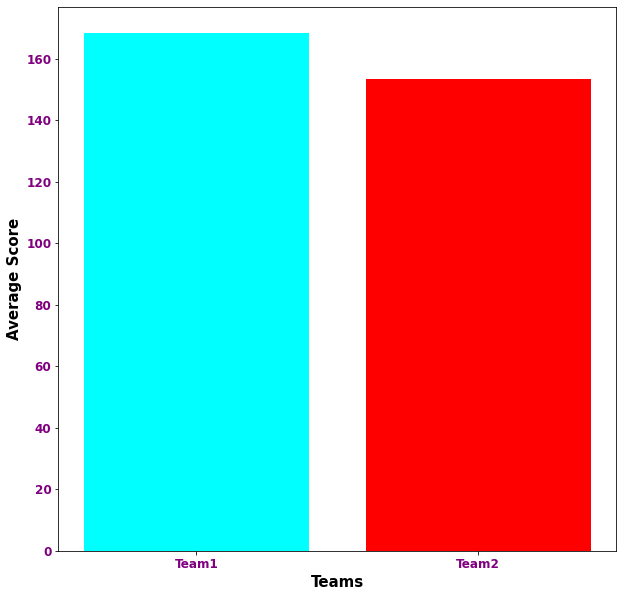

In [51]:
plt.figure(figsize = (10,10))
avg_team1_runs = sum(dd['Team1_Run'])/len(dd['Team1_Run'])
avg_team2_runs = sum(dd['Team2_Run'])/len(dd['Team2_Run'])
plt.bar(["Team1","Team2"],[avg_team1_runs, avg_team2_runs], color=['cyan','red'])
plt.xlabel("Teams", fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'purple')
plt.ylabel("Average Score", fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'purple')
plt.show()

###Maximum Average runs of a batsman

In [62]:
strk['average'].max()

88.0

In [67]:
i = strk['average'].idxmax()
strk.iloc[i]

batsman          Iqbal Abdulla
total_runs                  88
out                          1
numberofballs               83
average                   88.0
strikerate          106.024096
Name: 243, dtype: object

###Maximum Strikerate of Batsman

In [63]:
strk['strikerate'].max()

250.0

In [68]:
i = strk['strikerate'].idxmax()
strk.iloc[i]

batsman          B Stanlake
total_runs                5
out                       0
numberofballs             2
average                 0.0
strikerate            250.0
Name: 443, dtype: object

In [76]:
strk.query('strikerate > 150 and average > 50')

,batsman,total_runs,out,numberofballs,average,strikerate
109,J Bairstow,459,8,284,57.375,161.619718


J Bairstow is most likely to get **ORANGE CAP**.